# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from HANKnoStickyModel import HANKnoStickyModelClass

# Solve the model

In [2]:
model = HANKnoStickyModelClass(name='baseline')

In [3]:
par = model.par
ss = model.ss
path = model.path
sim = model.sim

In [4]:
model.find_ss(do_print=True)

Find optimal beta for market clearing
final evaluation
household problem in ss solved in 1.0 secs [283 iterations]
household problem in ss simulated in 1.0 secs [1220 iterations]
steady state found in 47.7 secs
 beta   = 0.9599
 nu     = 1.2957
Discrepancy in A =  -0.00000000
Discrepancy in L =  -0.00000000
Discrepancy in Y =  -0.00000000


# Testing

note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 2.0 secs
household problem simulated along transition in 2.2 secs



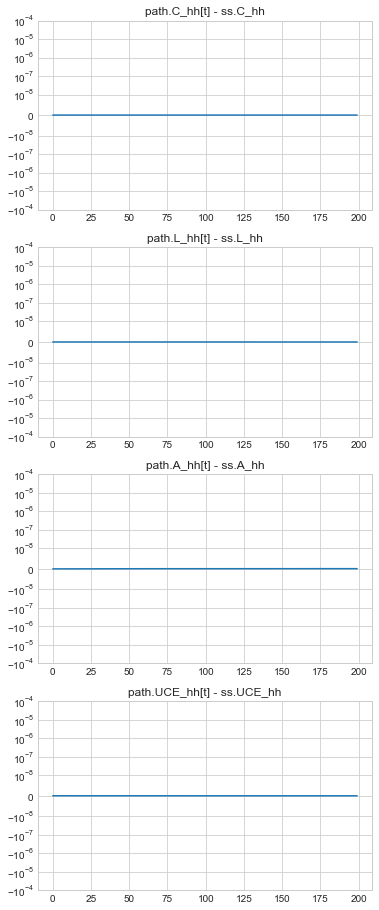

In [5]:
model.test_hh_path()

In [6]:
model.test_path()

note: inputs = steady state value -> expected: no difference to steady state and zero errors

difference to value at steady state:
A              : t0 =  8.6e-10, max abs.  8.6e-10
B              : t0 =  0.0e+00, max abs.  0.0e+00
clearing_A     : t0 = -8.6e-10, max abs.  8.6e-10
clearing_L     : t0 =  8.6e-10, max abs.  8.6e-10
clearing_Y     : t0 =  1.4e-11, max abs.  1.4e-11
clearing_Y     : t0 =  1.4e-11, max abs.  1.4e-11
Div_int        : t0 = -1.7e-16, max abs.  3.9e-16
Div_k          : t0 =  2.8e-17, max abs.  2.8e-17
Div            : t0 =  0.0e+00, max abs.  2.2e-16
eg             : t0 =  0.0e+00, max abs.  0.0e+00
em             : t0 =  0.0e+00, max abs.  0.0e+00
G              : t0 =  0.0e+00, max abs.  0.0e+00
i              : t0 =  0.0e+00, max abs.  0.0e+00
I              : t0 =  0.0e+00, max abs.  0.0e+00
Ip             : t0 =  0.0e+00, max abs.  0.0e+00
K              : t0 = -4.4e-16, max abs.  1.8e-15
L              : t0 = -8.6e-10, max abs.  8.6e-10
N              : t0

# Find transition path

In [7]:
model.compute_jacs(do_print=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for Z               in 1.0 secs
curly_Y and curly_D calculated for ra              in 1.0 secs
curly_Y and curly_D calculated for rl              in 1.1 secs
curly_E calculated in 2.9 secs
builiding blocks combined in 0.4 secs
household Jacobian computed in 6.4 secs

full Jacobians:
full Jacobian to unknowns computed in 5.1 secs [in evaluate_path(): 1.4 secs]
full Jacobian to shocks computed in 0.6 secs [in evaluate_path(): 0.3 secs]


In [8]:
model.find_transition_path(do_print=True, do_print_unknowns=True)

finding the transition path:
 it =   0 -> max. abs. error = 3.00e-04
   r              : minval =   0.012 meanval =   0.012 maxval =   0.012
   w              : minval =   0.798 meanval =   0.798 maxval =   0.798
   Y              : minval =   1.000 meanval =   1.000 maxval =   1.000
   Ip             : minval =   0.118 meanval =   0.118 maxval =   0.118
   Q              : minval =   1.000 meanval =   1.000 maxval =   1.000
   Pi             : minval =   0.000 meanval =   0.000 maxval =   0.000
   Pi_w           : minval =   0.000 meanval =   0.000 maxval =   0.000
   3.00e-04 in fisher_res
   0.00e+00 in w_res
   1.37e-11 in clearing_Y
   0.00e+00 in invest_res
   0.00e+00 in valuation_res
   1.20e-16 in NKPC_res
   4.33e-12 in NKPC_w_res
 it =   1 -> max. abs. error = 6.05e-06
   r              : minval =   0.012 meanval =   0.012 maxval =   0.013
   w              : minval =   0.797 meanval =   0.798 maxval =   0.798
   Y              : minval =   0.999 meanval =   1.000 maxval =  

In [9]:
model.find_IRFs(do_print=True)

linear transition path found in 0.1 secs [finding solution matrix: 0.1 secs]


In [10]:
paths = ['G','Y','C_hh','K','I',
         'N','w','tau','Pi','Pi_w','i','s','s_w','Z',
         'L_hh','A_hh',
         'rk','r','ra','rl',
         'q','B',
         'p_eq','Div','p_int','Div_int','p_k','Div_k','clearing_A','clearing_Y']
lvl_value = ['eg', 'em', 'i', 'Pi', 'Pi_w','clearing_Y','clearing_A']
abs_diff = ['r', 'ra', 'rl', 'i']
facs = {'r':100,'ra':100,'rl':100}

### shocks ###


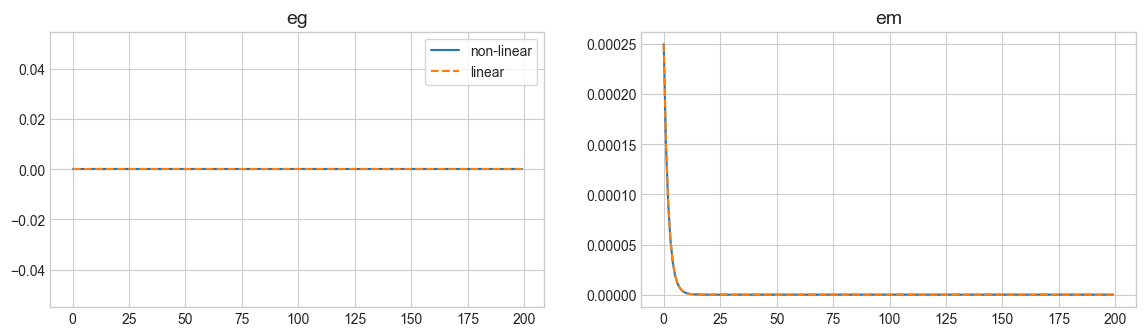


### varnames ###


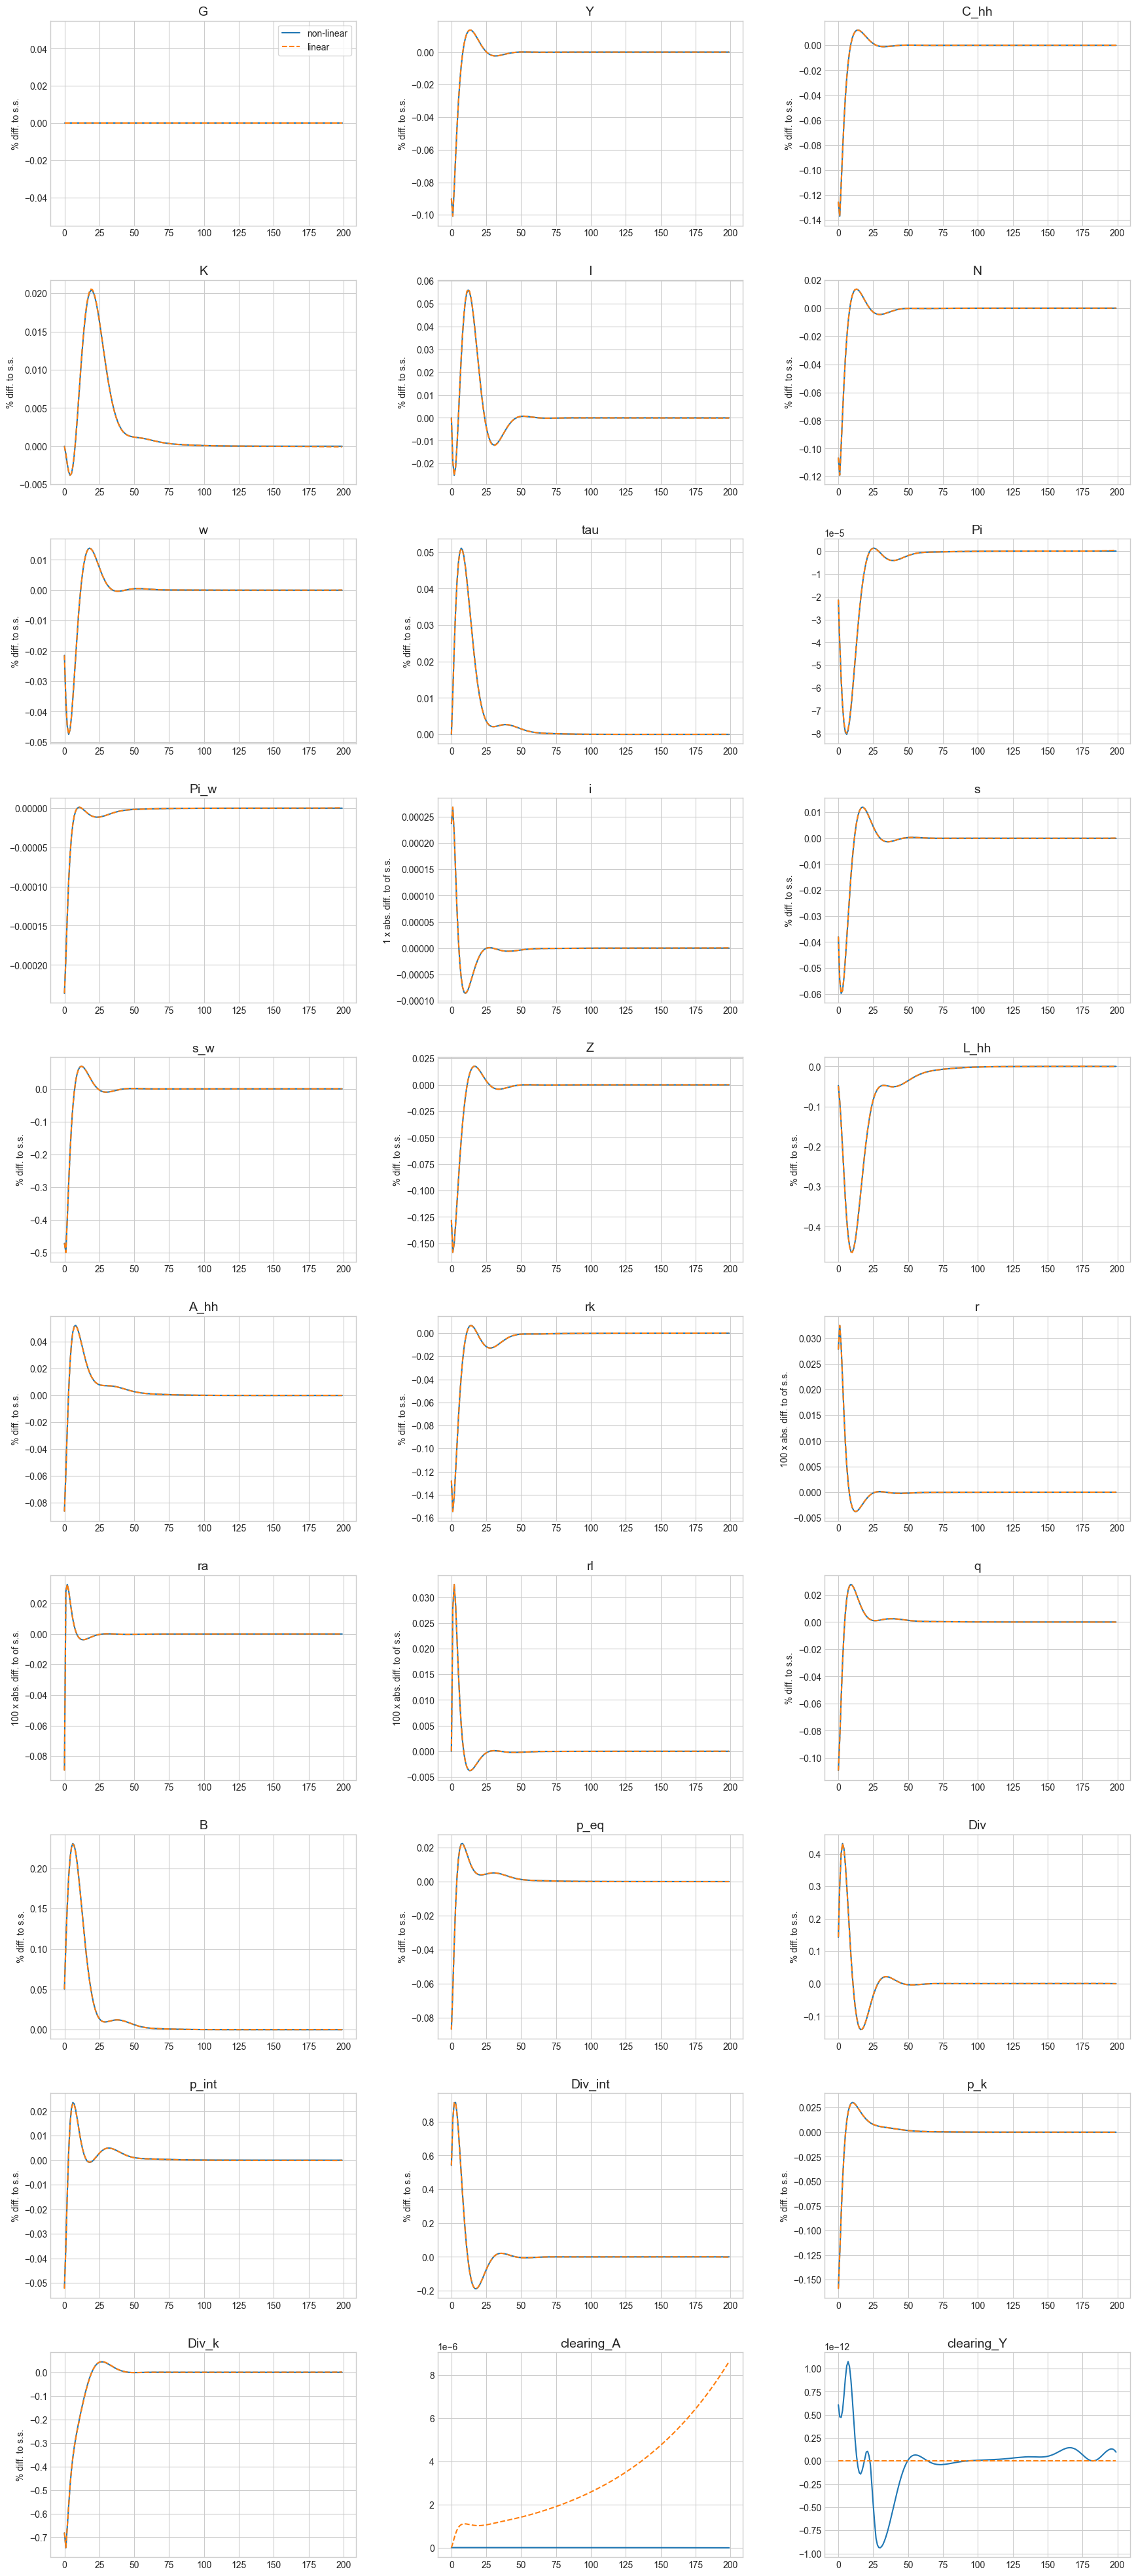


### tagets ###


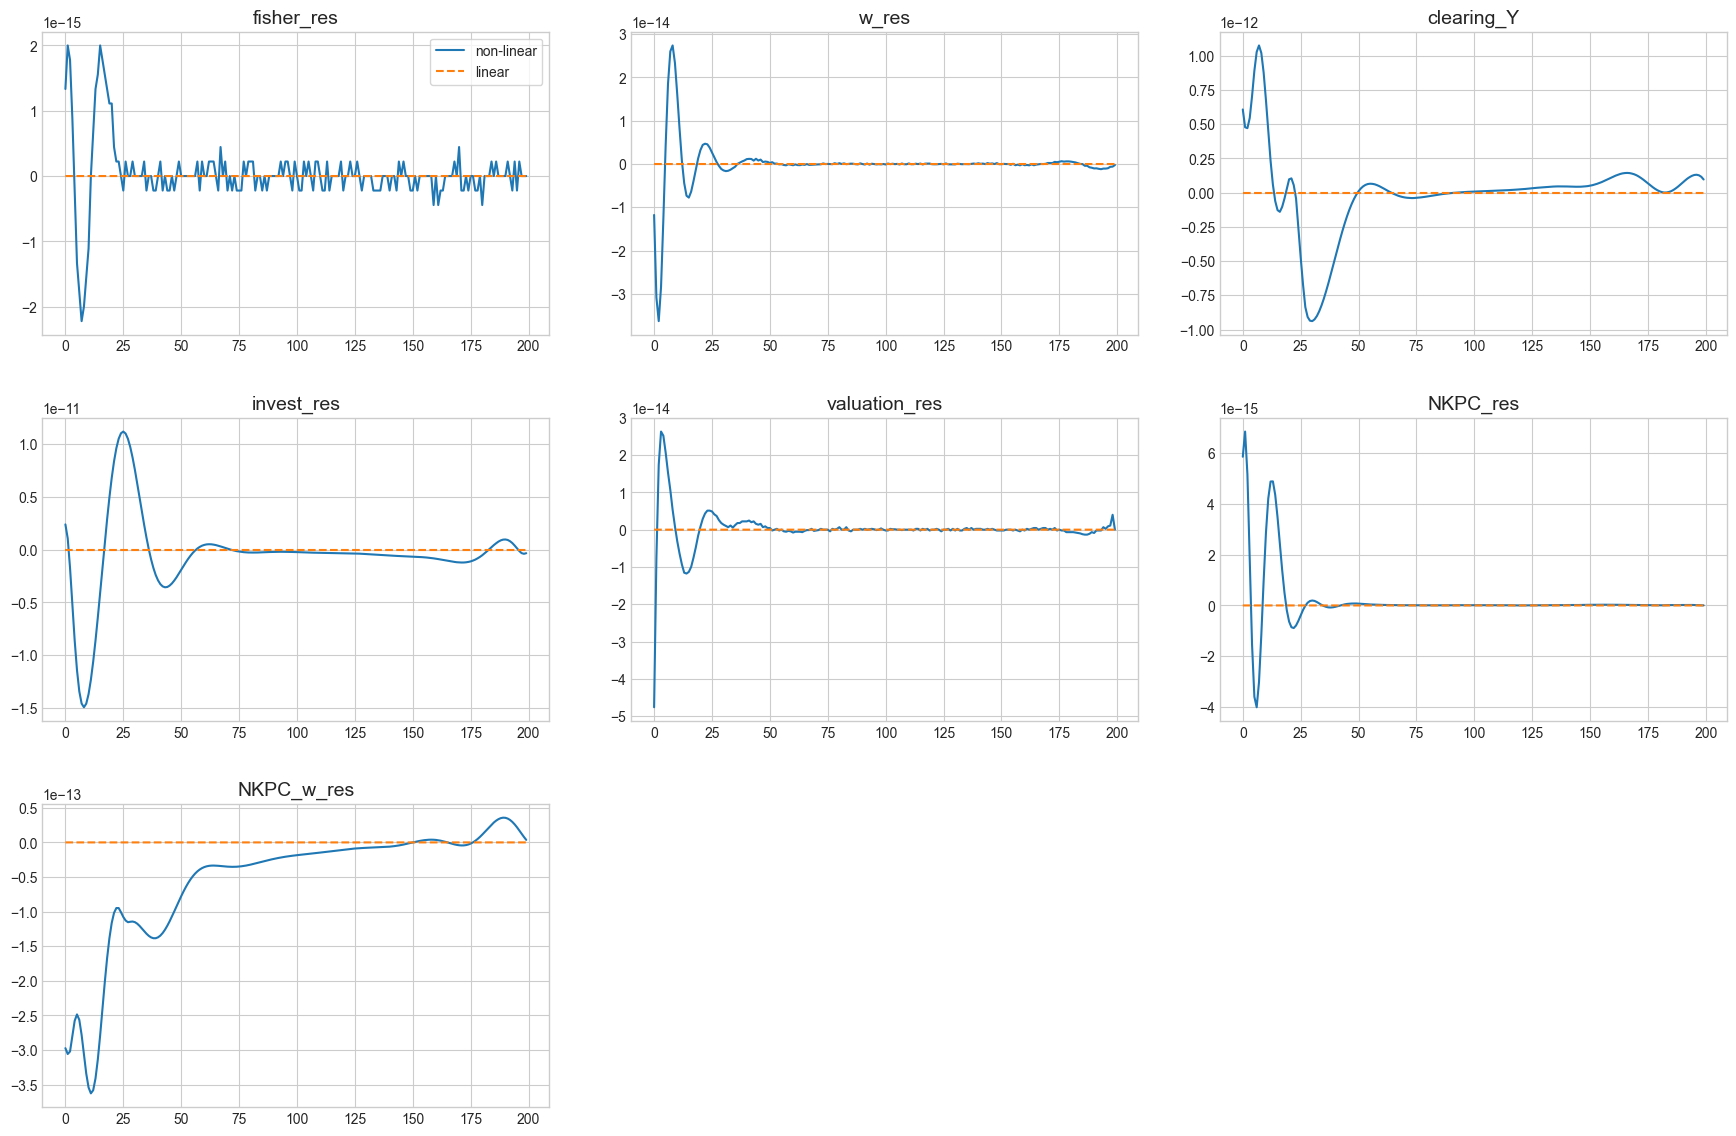

In [11]:
model.show_IRFs(paths,lvl_value=lvl_value,abs_diff=abs_diff,facs=facs,ncols=3,T_max=par.T,do_linear=True,do_shocks=True)

# Misc

In [12]:
model.print_unpack_varlist()

    for ncol in range(ncols):

        # unpack
        A = path.A[ncol,:]
        B = path.B[ncol,:]
        clearing_A = path.clearing_A[ncol,:]
        clearing_L = path.clearing_L[ncol,:]
        clearing_Y = path.clearing_Y[ncol,:]
        clearing_Y = path.clearing_Y[ncol,:]
        Div_int = path.Div_int[ncol,:]
        Div_k = path.Div_k[ncol,:]
        Div = path.Div[ncol,:]
        eg = path.eg[ncol,:]
        em = path.em[ncol,:]
        fisher_res = path.fisher_res[ncol,:]
        G = path.G[ncol,:]
        i = path.i[ncol,:]
        I = path.I[ncol,:]
        invest_res = path.invest_res[ncol,:]
        Ip = path.Ip[ncol,:]
        K = path.K[ncol,:]
        L = path.L[ncol,:]
        N = path.N[ncol,:]
        NKPC_res = path.NKPC_res[ncol,:]
        NKPC_w_res = path.NKPC_w_res[ncol,:]
        p_eq = path.p_eq[ncol,:]
        p_int = path.p_int[ncol,:]
        p_k = path.p_k[ncol,:]
        p_share = path.p_share[ncol,:]
        Pi_increase = path.Pi_increase[ncol,:]
   

In [13]:
np.allclose(path.ra[0,1:]-path.r[0,:-1],0.0)

True

In [14]:
path.ra[0,:5]

array([0.01138127, 0.01255045, 0.01259701, 0.0125579 , 0.0124922 ])